In [45]:
import pymssql
import pymysql
import time
import datetime
import numpy as np
from datetime import datetime as dt
from tqdm import *
from datetime import datetime as dt
from tqdm import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
MYSQL_TABLE_monitorvalue  = "monitordata"

def get_conn_mssql():
    server = '127.0.0.1:54037'
    user = 'sa'
    password = 'admin'
    database = 'YMOMS_SafeyMonitor_Node1'
    conn = pymssql.connect(server, user, password, database)
    return conn

def get_conn_mysql():
    conn = pymysql.connect(host='localhost', port=3306, user='root', passwd='admin', db='coalmine', charset='utf8')
    return conn

In [46]:
def get_sensor_data(sensor_ids):
    
    sids = "('" +  "','".join(sensor_ids) + "')"
    sql = "select MineID, Time, SensorID, Location, SensorType, Unit FROM [YMOMS_SafeyMonitor_Node1].[dbo].[SM_SensorHtData] \
        where SensorID in %s order by SensorID, Time;" % sids
    conn = get_conn_mssql()
    print(sql)
    cursor = conn.cursor()
    cursor.execute(sql)
    rows = cursor.fetchall()
    minid_list = []
    time_list, sid_list, loc_list = [], [], []
    st_list, unit_list = [] , []
    for item in rows:
        minid_list.append(item[0])
        time_list.append(item[1])
        sid_list.append(item[2])
        loc_list.append(item[3])
        st_list.append(item[4])
        unit_list.append(item[5])
    df = pd.DataFrame({'MineID':minid_list, 'Time':time_list, 'SensorID':sid_list, 'Location':loc_list, 'SensorType': st_list, 'Unit': unit_list})
    return df

In [47]:
sids = ['044A02','044A03','044A05','044A11']
df = get_sensor_data(sids)

select MineID, Time, SensorID, Location, SensorType, Unit FROM [YMOMS_SafeyMonitor_Node1].[dbo].[SM_SensorHtData]         where SensorID in ('044A02','044A03','044A05','044A11') order by SensorID, Time;


In [48]:
def check_duplicate(df):
    check_list = []
    last_row = None
    for index,row in df.iterrows():
        row = row.to_dict()
        if last_row and (last_row['SensorID'] == row['SensorID']) and (last_row['Location'] == row['Location'] and 
                                                                      (last_row['MineID']==row['MineID'])):
            check_list.append(True)
        else:
            check_list.append(False)
        last_row = row
    df['check'] = pd.Series(check_list)
    return df
df = check_duplicate(df)
df = df[~df['check']]

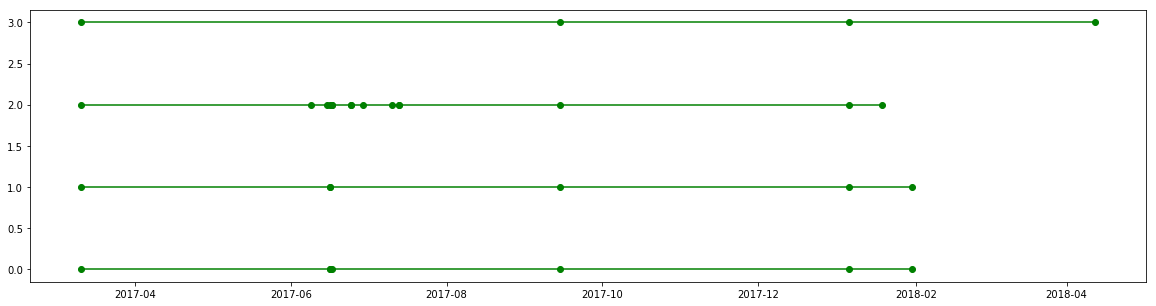

In [50]:
def draw_one(sign, time_series):
    sign = [sign] * time_series.index.size
    plt.plot(time_series,sign,'go-')

plt.figure(figsize=(20, 5))
minid = '14072401006'
for index, sid in  enumerate(sids):
    temp = df[(df['SensorID']==sid) & (df['MineID']==minid)]
    draw_one(index ,temp['Time']) 

In [52]:
# df[df['SensorID']==sids[0]]
# temp = df[(df['Time']>'2018-01-01 00:00:00') & (df['Time']<'2018-11-01 00:00:00')]
temp = df[df['MineID']=='14072401006']
temp.sort_values(by=['SensorID', 'Time'])
# df.sort_values(by=['Location'])

,Location,MineID,SensorID,SensorType,Time,Unit,check
0,F15117回风风筒风量,14072401006,044A02,M99,2017-03-10 15:27:09,m3/min,False
1,W15117回风工作面采区混合,14072401006,044A02,M02,2017-06-16 05:59:04,%,False
2,W15117工作面回风采区混合,14072401006,044A02,M02,2017-06-16 06:02:11,%,False
3,W15117工作面混合,14072401006,044A02,M02,2017-06-17 05:43:47,%,False
4,W15117工作面上隅角,14072401006,044A02,M02,2017-09-14 13:17:57,%,False
19,W15117上隅角,14072401006,044A02,M02,2018-01-05 18:00:45,%,False
24,W15117上隅角,14072401006,044A02,04,2018-01-30 11:33:09,%,False
33,W15117回风掘进回风,14072401006,044A03,M02,2017-03-10 15:27:09,%,False
34,W15117回风工作面甲烷,14072401006,044A03,M02,2017-06-16 05:59:04,%,False
35,W15117工作面回风甲烷,14072401006,044A03,M02,2017-06-16 06:02:11,%,False


In [8]:
data = pd.read_pickle('./data/044A02.pickle')

In [10]:
data.columns

Index(['MonitorValue', 'SensorID', 'Time'], dtype='object')

In [37]:
def plot_sensor_info(data, info, sid, minid,path=None):
    start = '2017-07-01 00:00:00'
    end = '2018-05-01 00:00:00'
    temp_info = info[(info['SensorID']==sid) & (info['MineID']== minid)]
    temp_data = data[(data['SensorID']== sid) & (data['Time']>start) & (data['Time']<end) & (data['MonitorValue']<1)]
    
    time = temp_data['Time']
    val = temp_data['MonitorValue']
#     val = val.rolling(6).max()
    time_info = temp_info['Time']
    val_info = [1] * time_info.index.size
    plt.figure(figsize=(20, 5))
    plt.plot(time, np.asarray([1]*len(time)))
    plt.plot(time, val, label=sid)
    plt.plot(time_info, val_info, 'go-')
    plt.legend()
    if path is None:
        plt.show()
    else:
        plt.savefig(path)
    return temp_info

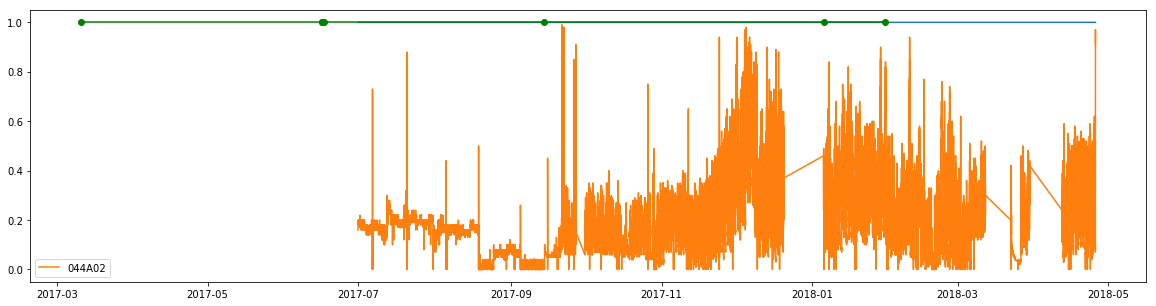

In [38]:
myinfo = plot_sensor_info(data, df, '044A02', '14072401006')

,Location,MineID,SensorID,SensorType,Time,Unit,check
0,F15117回风风筒风量,14072401006,044A02,M99,2017-03-10 15:27:09,m3/min,False
1,W15117回风工作面采区混合,14072401006,044A02,M02,2017-06-16 05:59:04,%,False
2,W15117工作面回风采区混合,14072401006,044A02,M02,2017-06-16 06:02:11,%,False
3,W15117工作面混合,14072401006,044A02,M02,2017-06-17 05:43:47,%,False
4,W15117工作面上隅角,14072401006,044A02,M02,2017-09-14 13:17:57,%,False
19,W15117上隅角,14072401006,044A02,M02,2018-01-05 18:00:45,%,False
24,W15117上隅角,14072401006,044A02,04,2018-01-30 11:33:09,%,False


In [41]:
sid , minid = '044A02', '14072401006'
start = '2017-09-15 00:00:00'
end = '2018-05-01 00:00:00'
used_data = data[(data['SensorID']== sid) & (data['Time']>start) & (data['Time']<end) & (data['MonitorValue']<1)]

In [43]:
used_data.to_pickle('./data/044A02_W15117上隅角_20170915_20180501')